In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression

%matplotlib inline


In [7]:
# df = pd.read_csv("houses_unemployed_old.csv")
# df.info()
df = pd.read_csv("houses_unemployed_new(2-5olde1.2).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371779 entries, 0 to 371778
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  371779 non-null  object 
 1   neighborhoods         371779 non-null  object 
 2   date                  371779 non-null  object 
 3   address               371779 non-null  object 
 4   helka                 371779 non-null  object 
 5   kind                  371779 non-null  object 
 6   rooms                 371779 non-null  float64
 7   floor                 371779 non-null  int64  
 8   size                  371779 non-null  float64
 9   price                 371779 non-null  float64
 10  day                   371779 non-null  int64  
 11  month                 371779 non-null  int64  
 12  year                  371779 non-null  int64  
 13  street                371779 non-null  object 
 14  number                371779 non-null  int64  
 15  

In [8]:
# df= df[df['city'].str.contains("ירושלים")]
# df.sort_values(by='date_sale', ascending=True, inplace=True)
# df1= df1[df1['city'].str.contains("ירושלים")]
df.sort_values(by='date_sale', ascending=True, inplace=True)
df

,city,neighborhoods,date,address,helka,kind,rooms,floor,size,price,day,month,year,street,number,date_sale,prime,unemployment_precent
368411,קריית ביאליק,מרכז העיר,01.01.1998,בן גוריון 56,11554-40-9,דירה בבית קומות,3.0,1,79.00,442000.0,1,1,1998,בן גוריון,56,1998-01-01,14.90,9.011397
368335,הוד השרון,שרת,01.01.1998,משאבים 26,6455-616-37,דירה בבית קומות,3.0,4,69.27,565000.0,1,1,1998,משאבים,26,1998-01-01,14.90,9.011397
366961,חיפה,רמת התשבי,01.01.1998,שומרון 4,11718-15-2,דירה בבית קומות,3.0,1,65.57,638000.0,1,1,1998,שומרון,4,1998-01-01,14.90,9.011397
368685,נתניה,גבע,01.02.1998,בן אליעזר 48,8260-113-1,דירה בבית קומות,4.0,4,100.00,722000.0,1,2,1998,בן אליעזר,48,1998-01-02,14.85,9.011397
366566,גבעתיים,ארלוזרוב,01.02.1998,הכנסת 32,6161-264-73,דירה בבית קומות,2.0,3,48.00,577000.0,1,2,1998,הכנסת,32,1998-01-02,14.85,9.011397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25134,תל אביב -יפו,כוכב הצפון,31.12.2020,"עגנון ש""י 28",6634-336-42,דירה בבית קומות,5.0,11,161.00,9103000.0,31,12,2020,"עגנון ש""י",28,2020-12-31,1.60,4.247013
25132,תל אביב -יפו,יפו העתיקה,31.12.2020,יפת 38,7259-8-52,דירה בבית קומות,5.0,9,208.60,10550000.0,31,12,2020,יפת,38,2020-12-31,1.60,4.247013
25126,תל אביב -יפו,רמת אביב ג,31.12.2020,אחימאיר אבא 1,6631-129-34,דירה בבית קומות,5.0,8,137.00,8391000.0,31,12,2020,אחימאיר אבא,1,2020-12-31,1.60,4.247013
16819,נהרייה,גבעת טרומפלדור,31.12.2020,יהודה המכבי 30,18208-66-4,דירה בבית קומות,2.0,2,36.10,420000.0,31,12,2020,יהודה המכבי,30,2020-12-31,1.60,4.247013


<AxesSubplot:>

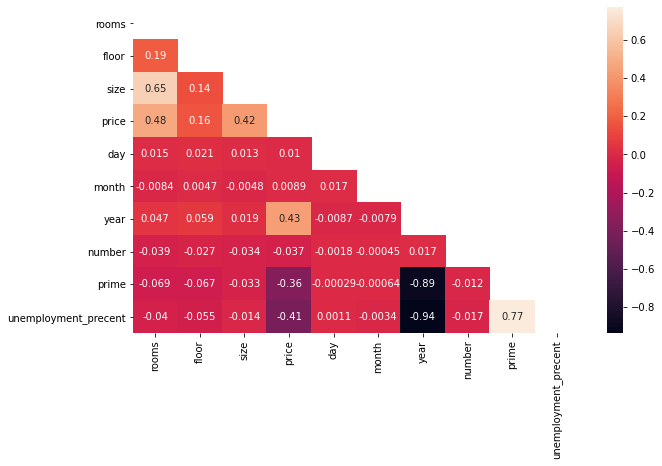

In [9]:
import seaborn as sns
df.corr()
fig, ax = plt.subplots(figsize=(10, 6)) 
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(), mask= mask, ax= ax, annot= True)

In [10]:

df1=pd.get_dummies(df['rooms'], prefix='rooms')
df = pd.concat([df, df1], axis=1)

df1=pd.get_dummies(df['neighborhoods'], prefix='neighborhoods')
df = pd.concat([df, df1], axis=1)

df1=pd.get_dummies(df['kind'], prefix='pre_')
df = pd.concat([df, df1], axis=1)

df1 = df._get_numeric_data()
df1.drop('day',axis="columns", inplace=True)

df = df._get_numeric_data()
df.drop(['number', 'day'],axis="columns", inplace=True)
df


,rooms,floor,size,price,month,year,prime,unemployment_precent,rooms_2.0,rooms_2.5,...,neighborhoods_תל חנן,neighborhoods_תל עמל,neighborhoods_תלפיות,neighborhoods_תלפיות מזרח,neighborhoods_תקומה,pre__דירה בבית קומות,pre__דירת גן,pre__וילה,pre__פנטהאוז,pre__קוטג'
368411,3.0,1,79.00,442000.0,1,1998,14.90,9.011397,0,0,...,0,0,0,0,0,1,0,0,0,0
368335,3.0,4,69.27,565000.0,1,1998,14.90,9.011397,0,0,...,0,0,0,0,0,1,0,0,0,0
366961,3.0,1,65.57,638000.0,1,1998,14.90,9.011397,0,0,...,0,0,0,0,0,1,0,0,0,0
368685,4.0,4,100.00,722000.0,2,1998,14.85,9.011397,0,0,...,0,0,0,0,0,1,0,0,0,0
366566,2.0,3,48.00,577000.0,2,1998,14.85,9.011397,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25134,5.0,11,161.00,9103000.0,12,2020,1.60,4.247013,0,0,...,0,0,0,0,0,1,0,0,0,0
25132,5.0,9,208.60,10550000.0,12,2020,1.60,4.247013,0,0,...,0,0,0,0,0,1,0,0,0,0
25126,5.0,8,137.00,8391000.0,12,2020,1.60,4.247013,0,0,...,0,0,0,0,0,1,0,0,0,0
16819,2.0,2,36.10,420000.0,12,2020,1.60,4.247013,1,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
df2 = df.copy()

In [77]:
df2.sort_values(by=['year','month'], ascending=True, inplace=True)
y = df2['unemployment_precent']
X = df2.drop(['unemployment_precent'], axis="columns").copy()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [79]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [80]:
print(f"med: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"r^2: {metrics.r2_score(y_test, y_pred)}")

med: 0.5645732120514168
r^2: 0.8963057260049698


<AxesSubplot:xlabel='year'>

<Figure size 1440x720 with 0 Axes>

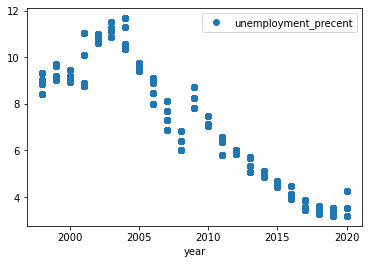

In [81]:
plt.figure(figsize=(20,10))
df2.plot(x='year', y='unemployment_precent', style='o')

In [82]:
df1['price'].corr(df1['unemployment_precent'])


-0.4135414475584724

In [91]:
arr1 = list(y_pred)
arr2 = list(y_test)
print("   Real === Predicted === Delta === Delta in %")
for i in range(20):
    print(f"{i+1}: {'{:.4}'.format(arr1[i])} ==== {'{:.4}'.format(arr2[i])}", end ='')
    print(f" ==== {'{:.4}'.format(abs(arr1[i]-arr2[i]))} === {'{:.4}'.format(abs(arr1[i]-arr2[i])/arr1[i])}")

   Real === Predicted === Delta === Delta in %
1: 4.286 ==== 3.886 ==== 0.4004 === 0.09341
2: 7.786 ==== 6.038 ==== 1.748 === 0.2245
3: 5.911 ==== 5.854 ==== 0.057 === 0.009643
4: 3.576 ==== 3.635 ==== 0.05819 === 0.01627
5: 6.238 ==== 5.801 ==== 0.4375 === 0.07013
6: 3.199 ==== 3.635 ==== 0.436 === 0.1363
7: 3.094 ==== 3.208 ==== 0.1141 === 0.03687
8: 4.535 ==== 4.127 ==== 0.4084 === 0.09005
9: 4.932 ==== 4.71 ==== 0.2222 === 0.04505
10: 9.966 ==== 9.456 ==== 0.5095 === 0.05113
11: 5.428 ==== 5.031 ==== 0.3975 === 0.07323
12: 4.439 ==== 4.482 ==== 0.04324 === 0.00974
13: 10.15 ==== 9.175 ==== 0.9742 === 0.09599
14: 6.968 ==== 7.061 ==== 0.09287 === 0.01333
15: 5.071 ==== 4.42 ==== 0.6512 === 0.1284
16: 5.088 ==== 4.518 ==== 0.5705 === 0.1121
17: 5.017 ==== 4.71 ==== 0.3067 === 0.06113
18: 10.05 ==== 8.9 ==== 1.152 === 0.1146
19: 2.56 ==== 4.247 ==== 1.687 === 0.6588
20: 3.895 ==== 3.56 ==== 0.3357 === 0.08617


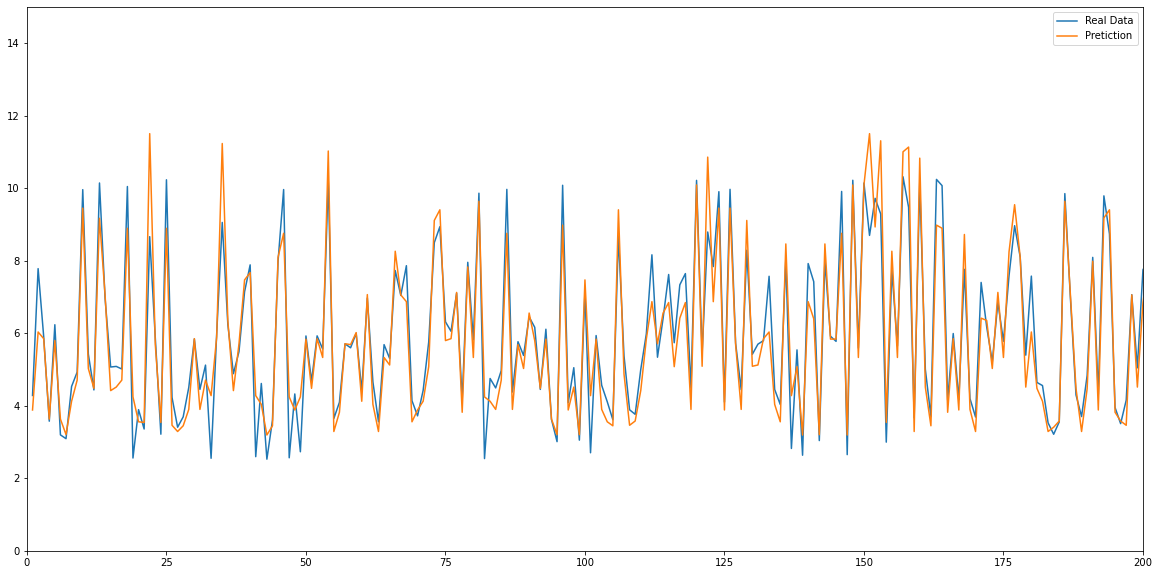

In [84]:
plt.figure(figsize=(20,10))
plt.plot(range(1,74357,1),arr1, label = "Real Data")
plt.plot(range(1,74357,1),arr2, label = "Prediction")
plt.xlim(0, 200)
plt.ylim(0, 15)
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (74356,) and (74355,)

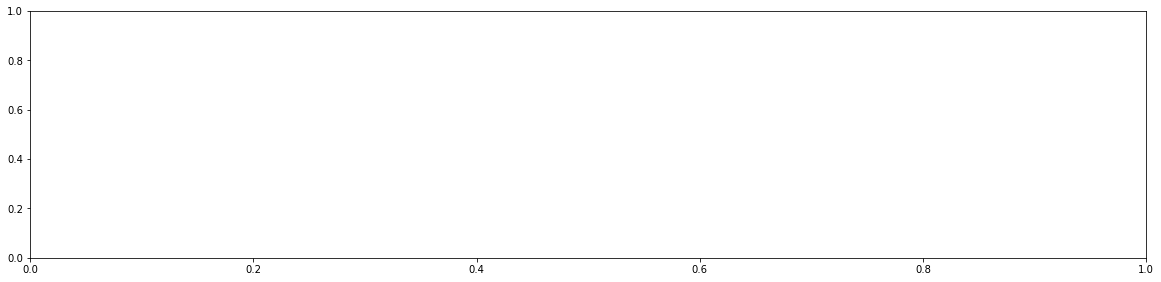

In [26]:

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(arr1, range(1,74355,1), 'bo', 'k')

plt.subplot(212)
plt.plot(arr2, range(1,74356,1), 'r--')
plt.xlim(0, 300)

In [44]:
df1.columns

Index(['rooms', 'floor', 'size', 'price', 'month', 'year', 'number', 'prime',
       'unemployment_precent', 'rooms_2.0', 'rooms_2.5', 'rooms_3.0',
       'rooms_3.5', 'rooms_4.0', 'rooms_4.5', 'rooms_5.0',
       'חחחחח_דירה בבית קומות', 'חחחחח_דירת גן', 'חחחחח_וילה', 'חחחחח_פנטהאוז',
       'חחחחח_קוטג''],
      dtype='object')

In [45]:
# dataset=pd.DataFrame(data=df,columns=df.columns)
 
# # to find the correlation, use corr() method on the dataset
# corr=dataset.corr()
 
# plt.xticks(range(len(df.columns)),df.columns,rotation=90)
# plt.yticks(range(len(df.columns)),df.columns)
# plt.imshow(corr, cmap='Blues_r',interpolation="nearest")


(0.0, 10000000.0)

<Figure size 1440x720 with 0 Axes>

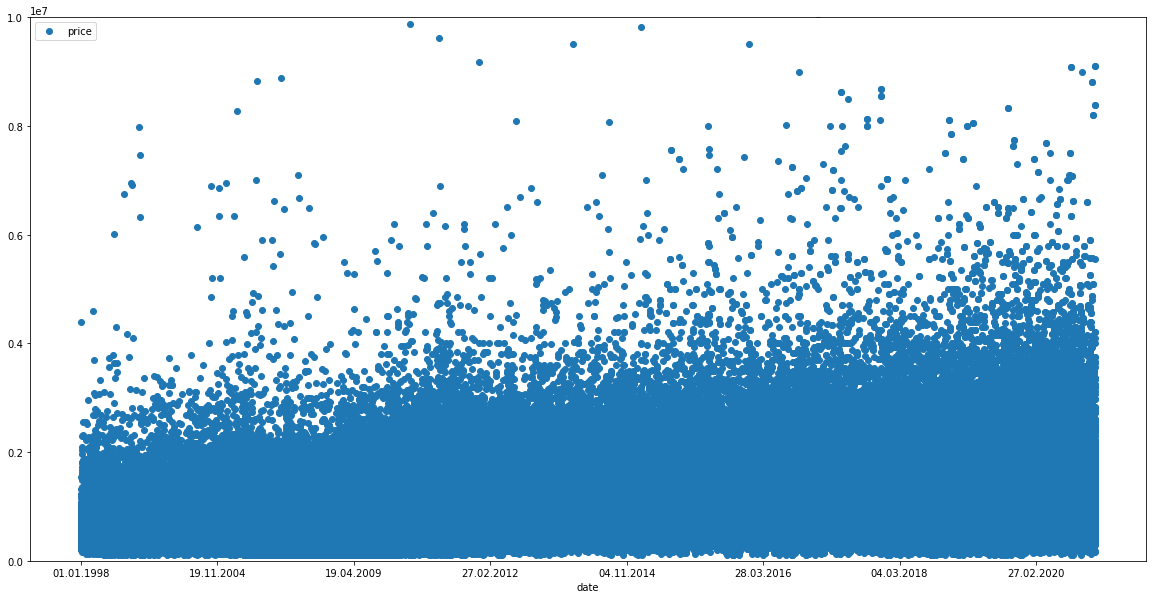

In [51]:
plt.figure(figsize=(20,10))
# dfcopy=df[df['kind_דירה בבית קומות']==True]
# dfcopy=dfcopy[dfcopy['rooms']==5]
df.plot(x='date', y='price', style='o', figsize=(20,10))
plt.ylim(0, 10000000)


In [54]:
df

,city,neighborhoods,date,address,helka,kind,rooms,floor,size,price,...,rooms_3.0,rooms_3.5,rooms_4.0,rooms_4.5,rooms_5.0,חחחחח_דירה בבית קומות,חחחחח_דירת גן,חחחחח_וילה,חחחחח_פנטהאוז,חחחחח_קוטג'
368411,קריית ביאליק,מרכז העיר,01.01.1998,בן גוריון 56,11554-40-9,דירה בבית קומות,3.0,1,79.00,442000.0,...,1,0,0,0,0,1,0,0,0,0
368335,הוד השרון,שרת,01.01.1998,משאבים 26,6455-616-37,דירה בבית קומות,3.0,4,69.27,565000.0,...,1,0,0,0,0,1,0,0,0,0
366961,חיפה,רמת התשבי,01.01.1998,שומרון 4,11718-15-2,דירה בבית קומות,3.0,1,65.57,638000.0,...,1,0,0,0,0,1,0,0,0,0
369047,חדרה,הזיתים,01.02.1998,פרנק 19,10049-284-304,דירה בבית קומות,5.0,0,120.00,541000.0,...,0,0,0,0,1,1,0,0,0,0
371384,בת ים,רמת הנשיא,01.02.1998,כהן אלי 6,7128-48-33,דירה בבית קומות,2.0,3,42.30,429000.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943,חיפה,נווה פז,31.12.2020,חטיבת כרמלי 40,11212-61-23,דירה בבית קומות,2.0,7,43.60,530000.0,...,0,0,0,0,0,1,0,0,0,0
13278,ערד,נעורים,31.12.2020,מזמור 18,38245-10-2,קוטג',5.0,1,133.00,1575000.0,...,0,0,0,0,1,0,0,0,0,1
21705,אשקלון,אפרידר,31.12.2020,עוזר אריה 14,1241-58-45,דירה בבית קומות,3.0,4,79.00,760000.0,...,1,0,0,0,0,1,0,0,0,0
16504,פתח תקווה,מחנה יהודה,31.12.2020,הצנחנים 19,6406-27-4,דירה בבית קומות,4.0,4,95.00,1820000.0,...,0,0,1,0,0,1,0,0,0,0


(0.0, 10000000.0)

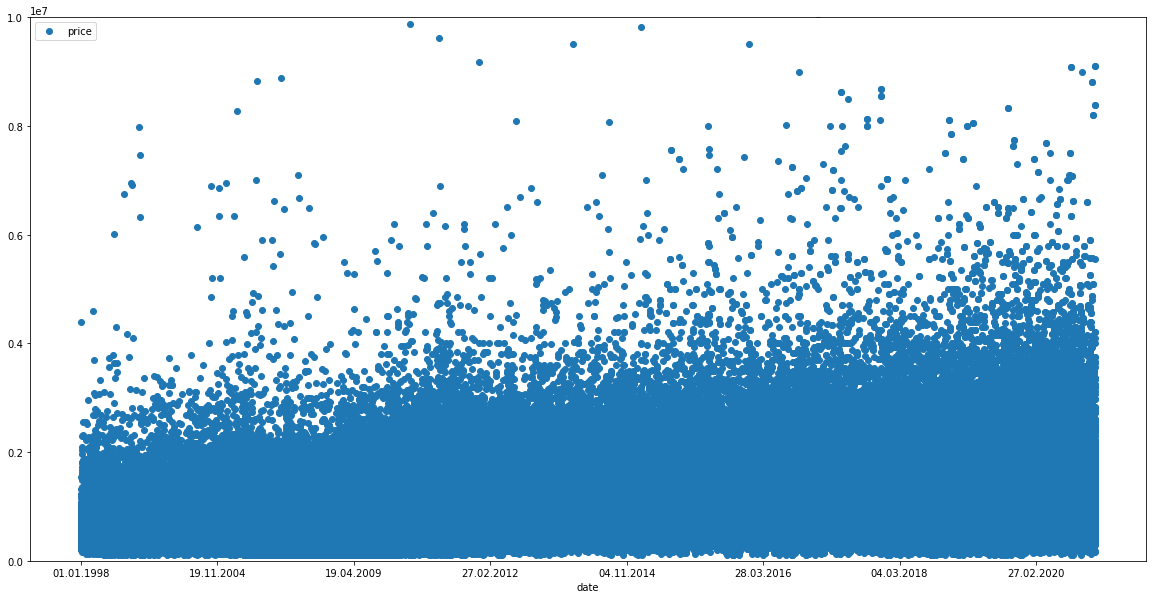

In [48]:
dfcopy2 = df.copy()
dfcopy2.plot(x='date', y='price', style='o', figsize=(20,10))
plt.ylim(0, 10000000)

(0.0, 10000000.0)

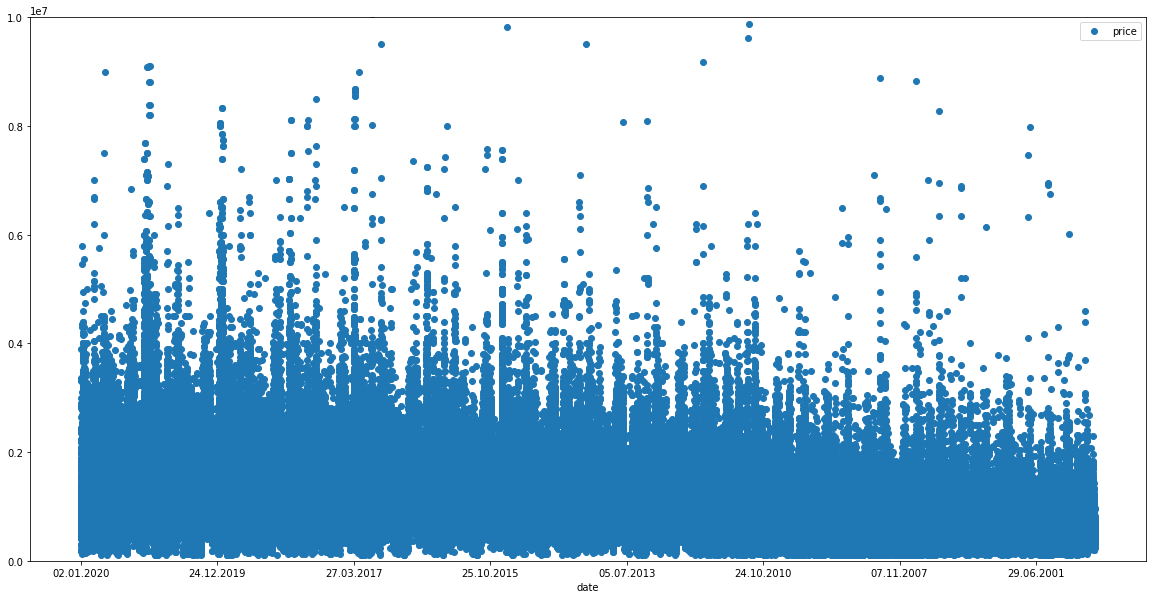

In [65]:
dfcopy3 = df1.copy()
dfcopy3.plot(x='date', y='price', style='o', figsize=(20,10))
plt.ylim(0, 10000000)

In [6]:
df100 = df.copy()
conda install -c conda-forge python-bidi

In [19]:
# from bidi import algorithm as bidialg

# my_labels = set(df100["city"])
# my_labels = [bidialg.get_display(val) for val in my_labels]
# Tasks = df100["city"].value_counts()
# plt.pie(Tasks,labels=my_labels, figsize=(20,10))

In [1]:
from bidi import algorithm as bidialg
df101 = df100.copy()
df101['city'] = [bidialg.get_display(
    row['city']) for index, row in df100.iterrows()]
df101["city"].value_counts().plot(
    kind='pie',title="Distribution Of Sales By Cities",
    fontsize=20, figsize=(25,15))

NameError: name 'df100' is not defined

In [62]:
df2 = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371779 entries, 368411 to 9765
Columns: 869 entries, rooms to pre__קוטג'
dtypes: float64(5), int64(3), uint8(861)
memory usage: 330.8 MB


In [49]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Importing the dataset

# X = dataset.iloc[:, :-1].values #get a copy of dataset exclude last column
# y = dataset.iloc[:, 1].values #get array of dataset in column 1st

In [63]:
df["unemployment_precent1"] = df['unemployment_precent']
df.drop(['unemployment_precent'], axis=1, inplace=True) 
df["unemployment_precent"] = df['unemployment_precent1']
df.drop(['unemployment_precent1'], axis=1, inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371779 entries, 368411 to 9765
Columns: 869 entries, rooms to unemployment_precent
dtypes: float64(5), int64(3), uint8(861)
memory usage: 330.8 MB


In [90]:
df1=pd.get_dummies(df['city'], prefix='city_')
df = pd.concat([df, df1], axis=1)


,city,neighborhoods,date,address,helka,kind,rooms,floor,size,price,...,city__קריית מוצקין,city__קריית מלאכי,city__ראש העין,city__ראשון לציון,city__רחובות,city__רמלה,city__רמת השרון,city__רעננה,city__שדרות,city__תל אביב -יפו
0,נתיבות,בבא סאלי,02.01.2020,חזני 1138,39579-30-5,דירה בבית קומות,4.0,3,72.00,760000.0,...,0,0,0,0,0,0,0,0,0,0
1,נתיבות,ברית כהונה,01.01.2020,מסעוד אלפסי 1068,39578-33-23,דירה בבית קומות,4.0,2,63.00,800000.0,...,0,0,0,0,0,0,0,0,0,0
2,נתיבות,לוי אשכול,02.01.2020,ורדימון יצחק 4,39581-49-5,דירה בבית קומות,4.0,3,80.47,620000.0,...,0,0,0,0,0,0,0,0,0,0
3,נתיבות,קרית מנחם בגין,31.01.2020,ירושלים 138,39616-25-9,דירה בבית קומות,4.0,2,77.40,680000.0,...,0,0,0,0,0,0,0,0,0,0
4,נתיבות,קרית מנחם בגין,22.01.2020,ירושלים 171,39616-26-6,דירה בבית קומות,4.0,2,79.60,670000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371774,רמלה,וייצמן,03.11.1998,ויצמן 16,5804-21-19,דירה בבית קומות,3.0,1,68.70,388000.0,...,0,0,0,0,0,1,0,0,0,0
371775,רמלה,משכנות,23.11.1998,שבזי 10,5803-49-10,דירה בבית קומות,3.0,2,52.98,305000.0,...,0,0,0,0,0,1,0,0,0,0
371776,רמלה,בן גוריון,13.12.1998,בן גוריון 8,8/5/5809,דירה בבית קומות,4.0,2,79.00,519000.0,...,0,0,0,0,0,1,0,0,0,0
371777,רמלה,בן גוריון,06.12.1998,בן גוריון 26,10/27/5810,דירה בבית קומות,4.0,7,79.00,451000.0,...,0,0,0,0,0,1,0,0,0,0


In [94]:
df.drop(['city', 'neighborhoods', 'date', 'address', 'helka'], axis="columns", inplace=True)

KeyError: "['city' 'neighborhoods' 'date' 'address' 'helka'] not found in axis"

In [97]:
df.drop(['kind'], axis="columns", inplace=True)

In [101]:
df.drop(['street', 'date_sale'], axis="columns", inplace=True)

In [111]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
y = df.iloc[:, -1:].values
X = df[:, 1].reshape(-1, 1).values()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

TypeError: '(slice(None, None, None), 1)' is an invalid key

In [109]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

ValueError: x and y must be the same size

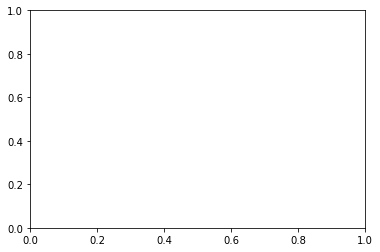

In [110]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

In [79]:
X

array([[1],
       [4],
       [1],
       ...,
       [8],
       [2],
       [3]], dtype=int64)

In [80]:
y

array([1, 4, 1, ..., 8, 2, 3], dtype=int64)